In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_39/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Checkpoint Evaluación de modelos e importancia de features

## Dataset

**Introducción**

La Organización Mundial de la Salud ha estimado que 12 millones de muertes ocurren en todo el mundo, cada año debido a enfermedades del corazón. La mitad de las muertes en los Estados Unidos y otros países desarrollados se deben a enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar a tomar decisiones sobre los cambios en el estilo de vida en pacientes de alto riesgo y, a su vez, reducir las complicaciones. Esta investigación tiene la intención de identificar los factores más relevantes / de riesgo de enfermedad cardíaca, así como predecir el riesgo general mediante distintos modelos de clasificación

**Fuente**

El conjunto de datos está disponible públicamente en el sitio web de Kaggle (https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset), y proviene de un estudio cardiovascular en curso en residentes de la ciudad de Framingham, Massachusetts. El objetivo de la clasificación es predecir si el paciente tiene riesgo de enfermedad coronaria (CHD) en los próximos 10 años. El conjunto de datos proporciona la información del paciente. Incluye más de 4000 registros y 15 atributos.

**Variables**

Cada atributo es un factor de riesgo potencial. Hay factores de riesgo demográficos, conductuales y médicos.

Demográficos:

• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Médicos (histórico):

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Médicos (actual):

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Variable a predecir (target):

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report



## Ejercicio 1 - Preparación de datos

1.1) Leamos los datos del archivo datasets_222487_478477_framingham.csv

1.2) ¿Qué porcentaje de registros hay en cada una de las categorías target?

1.3) ¿El dataset tiene datos faltantes?

1.4) Usemos `dropna` para eliminar los registros con valores faltantes, y volvamos a calcular el porcentaje de registros hay en cada una de las categorías target 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


In [5]:
data_raw = pd.read_csv('../Data/datasets_222487_478477_framingham.csv')
data_raw.shape

(4238, 16)

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Veamos qué procentaje de registros hay en cada una de las categorías target

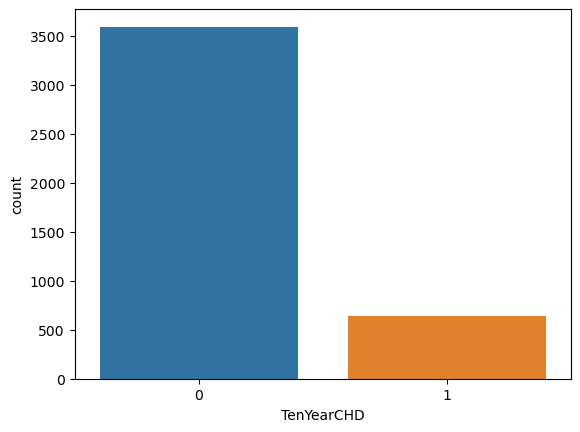

In [9]:
sns.countplot(data=data_raw, x= data_raw.TenYearCHD)
plt.show()

In [10]:
data_raw.TenYearCHD.value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

In [11]:
data_raw.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Vemos que en este caso, eliminando los registros que tienen algun valor nulo no cambiamos la proporción de registros en cada una de las categorías target

In [13]:
data_raw.dropna(inplace = True)

In [14]:
data_raw.TenYearCHD.value_counts(normalize = True)

0    0.847648
1    0.152352
Name: TenYearCHD, dtype: float64

## Ejercicio 2 - Train Test Split + StandardScaler

Construir los conjuntos de entranamiento y test y usando StandardScaler normalizar las features

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [16]:
X = data_raw.drop('TenYearCHD', axis=1)
y = data_raw.TenYearCHD


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1203)

In [18]:
esc = StandardScaler()

X_train = esc.fit_transform(X_train)
X_test = esc.transform(X_test)

## Ejercicio 3 - Opcional (pero recomendado)

Escribir una función que reciba como parámetros 

* la instancia de un modelo
* X_train, los registros con los valores de las features predictoras en el dataset de entrenamiento;
* y_train, los registros con el valor del target en el dataset de entrenamiento;
* X_test, los registros con los valores de las features predictoras en el dataset de testing;
* y_test, los registros con el valor del target en el dataset de testing;
* gridSearch_params, los parámetros para usar en grid search para la instancia del modelo
* gridSearch_bagging_params, los parámetros para usar en grid search para bagging

La función debe entrenar 

* El modelo que recibe como parámetro usando X_train, y_train

* Grid Search Cross Validation KFold: `cv_KFold = KFold(n_splits=3, shuffle=True, random_state=371)`
    

* Grid Search CV Stratified KFold: `StratifiedKFold(n_splits=3, shuffle=True, random_state=371)`

* Bagging

* Bagging Grid Search Stratified Cross Validation: usando como base el mejor estimador devuelto en Grid Search CV Stratified KFold y `StratifiedKFold(n_splits=3, shuffle=True, random_state=371)`

Esta función debe devolver alguna estructura de datos, por ejemplo un diccionario, donde después podamos consultar el score en test de cada uno de los modelos, y los valores de media y desvío del score en los entrenamientos con grid search.


In [4]:
def evaluate_model(model_instance, X_train, y_train, X_test, y_test, gridSearch_params, gridSearch_bagging_params):

    
    
    return None

    
    
    
    

## Ejercicio 4

Entrenar un modelo de clasificación basado en árboles, usando bagging y grid search cross validation estratificado sobre los parámetros de bagging, y calcular el score en test de cada uno de los modelos, y los valores de media y desvío del score en los entrenamientos con grid search cross validation.

Los parámetros de GridSearchCV que vamos a probar son 

``params =  {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}``

Los parámetros de bagging que vamos a probar son

<code>
bagging_params = {'n_estimators': [10, 100],

                  'max_samples': [0.01, 1.0],
                  
                  'max_features': [0.3, 1.0],
                  
                  'bootstrap_features': [True, False]}
</code>

Si resolvieron el ejercicio 3, pueden usar esa función. 

Si no, pueden hacer cada uno de los entrenamientos en la misma forma que venimos haciendo en las prácticas anteriores

## Ejercicio 5 _ Performance

En este ejercicio vamos a repasar dos métodos para evaluar la performance de un modelo.

* accuracy_score - Accuracy = (TP + TN)/(TP + TN + FP + FN)

* classification_report
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Vamos a evaluarlas sobre el modelo de bagging Stratified KFold cross validation que usa de base el mejor modelo de decision tree resultado gridsearch estratificado `StratifiedKFold(n_splits=3, shuffle=True, random_state=371)`


## Ejercicio 6 - Feature importance

Veamos qué importancia tiene cada una de las features del modelo entrenado en el ejercicio anterior

## Ejercicio 7 - Extra

Calculen el área bajo la curva como medida de performance de alguno de los clasificadores entrenados

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py


## Referencias 

Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html

StratifiedKFold
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

Grid Search
https://scikit-learn.org/stable/modules/grid_search.html#grid-search

ROC
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

BaggingClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
